# 1. Import  Libraries

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image.flags.writeable = False                  
    results = model.process(image)                 
    image.flags.writeable = True                  
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results

In [4]:
def draw_landmarks(image, results):
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
#                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
#                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
#                              ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
len(results.left_hand_landmarks.landmark)

21

In [8]:
results

mediapipe.python.solution_base.SolutionOutputs

In [9]:
draw_landmarks(frame, results)

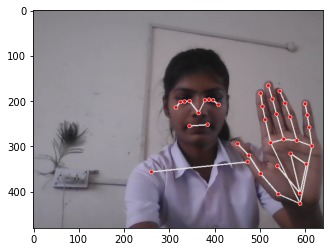

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [11]:
len(results.left_hand_landmarks.landmark)


21

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
# face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [13]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
#     face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [14]:
result_test = extract_keypoints(results)
result_test

array([ 5.70860028e-01,  4.72412914e-01, -6.42171681e-01,  9.99994934e-01,
        5.93611598e-01,  4.12785649e-01, -5.96357882e-01,  9.99988019e-01,
        6.07789040e-01,  4.12181050e-01, -5.96088767e-01,  9.99988735e-01,
        6.20621264e-01,  4.12613213e-01, -5.95516145e-01,  9.99984741e-01,
        5.40553749e-01,  4.16699827e-01, -6.04187965e-01,  9.99986231e-01,
        5.22215426e-01,  4.18908209e-01, -6.03662610e-01,  9.99985218e-01,
        5.08391082e-01,  4.21026558e-01, -6.03966355e-01,  9.99980271e-01,
        6.39145970e-01,  4.33757961e-01, -3.09179962e-01,  9.99983549e-01,
        4.93663162e-01,  4.47194397e-01, -3.43898743e-01,  9.99991417e-01,
        6.02933288e-01,  5.26570976e-01, -5.36318898e-01,  9.99990582e-01,
        5.40563941e-01,  5.33279300e-01, -5.46045482e-01,  9.99992967e-01,
        7.40513742e-01,  6.96366012e-01, -1.03508115e-01,  9.99552548e-01,
        4.09055382e-01,  7.42308915e-01, -2.21376583e-01,  9.98991549e-01,
        9.70313728e-01,  

In [15]:
33*4+21*3+21*3

258

In [124]:
np.save('0', result_test)
np.load('0.npy')

array([ 5.81777811e-01,  4.50865716e-01, -5.74298680e-01,  9.99853730e-01,
        6.06678784e-01,  3.96760315e-01, -5.40092528e-01,  9.99812901e-01,
        6.23817801e-01,  3.92556846e-01, -5.39734960e-01,  9.99793649e-01,
        6.40097857e-01,  3.89198840e-01, -5.39261222e-01,  9.99819160e-01,
        5.58453679e-01,  4.09412354e-01, -5.19556224e-01,  9.99784410e-01,
        5.44649005e-01,  4.13103938e-01, -5.18854916e-01,  9.99736607e-01,
        5.31646848e-01,  4.16791469e-01, -5.19131482e-01,  9.99737859e-01,
        6.66761398e-01,  4.06030744e-01, -2.90040761e-01,  9.99843895e-01,
        5.20436645e-01,  4.39400017e-01, -1.83836579e-01,  9.99651551e-01,
        6.17062926e-01,  4.97917384e-01, -4.81835991e-01,  9.99799550e-01,
        5.59291601e-01,  5.10023177e-01, -4.51078594e-01,  9.99760687e-01,
        7.94596553e-01,  6.61897004e-01, -1.39687523e-01,  9.99244452e-01,
        4.84342277e-01,  7.03962207e-01, -1.22888898e-02,  9.95551407e-01,
        9.94778514e-01,  

# 4. Setup Folders for Collection

In [90]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('Data_rh') 

# Actions that we try to detect
actions = np.array(['Sorry','Hello','I am Good','Food','Stop','There is Gun'])


no_sequences = 50


sequence_length = 30

In [91]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [83]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [92]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [93]:

label_map = {label:num for num, label in enumerate(actions)}

In [94]:
label_map

{'Sorry': 0,
 'Hello': 1,
 'I am Good': 2,
 'Food': 3,
 'Stop': 4,
 'There is Gun': 5}

In [95]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [96]:
np.array(sequences).shape

(300, 30, 258)

In [97]:
np.array(labels).shape

(300,)

In [127]:
X = np.array(sequences)

In [99]:
X.shape

(300, 30, 258)

In [100]:
y = to_categorical(labels).astype(int)

In [101]:
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

In [102]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
y_val.shape

(60, 6)

# 7. Build and Train LSTM Neural Network

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from keras.regularizers import l1

In [117]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# log_dir = os.path.join('Logs')
# tb_callback = TensorBoard(log_dir=log_dir)

checkpoint = ModelCheckpoint("lh_model.h5",
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True,verbose=1)

earlystop = EarlyStopping(monitor='val_accuracy',
                          min_delta=0,
                          patience=20,
                          verbose=1,
                          restore_best_weights=True)

callbacks=[checkpoint,earlystop]


In [118]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras import regularizers

model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 258)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(256, return_sequences=False, activation='relu'))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
model.add(Dense(actions.shape[0], activation='softmax'))


In [121]:
# model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
import tensorflow as tf
model.compile(loss='categorical_crossentropy',
                   optimizer=RMSprop(learning_rate=0.0001),
                   metrics=['accuracy', tf.keras.metrics.AUC()])


In [122]:
history = model.fit(X_train, y_train, epochs=100, callbacks=callbacks, validation_data=(X_val, y_val))

Epoch 1/100
8/8 [==============================] - 15s 497ms/step - loss: 1.8819 - accuracy: 0.1409 - auc: 0.5159 - val_loss: 1.8653 - val_accuracy: 0.1333 - val_auc: 0.5634s - loss: 1.8892 - accuracy: 0.1441 -

Epoch 00001: val_accuracy improved from -inf to 0.13333, saving model to lh_model.h5
Epoch 2/100
8/8 [==============================] - 2s 238ms/step - loss: 1.8110 - accuracy: 0.1999 - auc: 0.6250 - val_loss: 1.7592 - val_accuracy: 0.1833 - val_auc: 0.6736

Epoch 00002: val_accuracy improved from 0.13333 to 0.18333, saving model to lh_model.h5
Epoch 3/100
8/8 [==============================] - 2s 237ms/step - loss: 1.7067 - accuracy: 0.2846 - auc: 0.6969 - val_loss: 1.5976 - val_accuracy: 0.3167 - val_auc: 0.7751

Epoch 00003: val_accuracy improved from 0.18333 to 0.31667, saving model to lh_model.h5
Epoch 4/100
8/8 [==============================] - 2s 240ms/step - loss: 1.4445 - accuracy: 0.4495 - auc: 0.8480 - val_loss: 1.4039 - val_accuracy: 0.5167 - val_auc: 0.8128

Epoch